# Model 1: logistic regression

In [1]:
# Import libraries
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading dataset and dropping the first column, because it contains rownumbers
data = pd.read_csv('data/Kickstarter_cleaned2.csv')
df = data.drop(columns=['Unnamed: 0'])
df.columns

Index(['backers_count', 'id', 'usd_pledged', 'category_name', 'category_id',
       'category_parent_id', 'usd_goal', 'duration_days', 'duration_days_prep',
       'year_deadline', 'month_deadline', 'weekday_deadline',
       'weekday_launched_at', 'winter_deadline_True', 'spring_deadline_True',
       'summer_deadline_True', 'deadline_weekend_True',
       'launched_weekend_True', 'country_US_True', 'eastcoast_True',
       'long_blurb_True', 'long_name_True', 'state_b_True',
       'long_creator_name_True'],
      dtype='object')

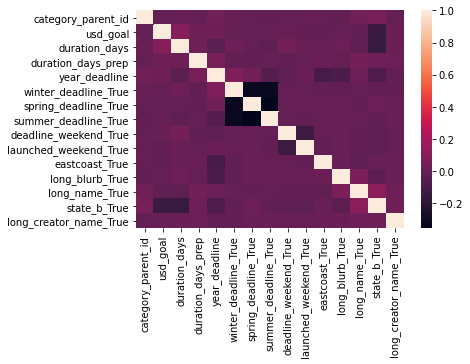

In [3]:
# Visualize correlations on a heatmap
df1 = df.drop(columns=["backers_count","id","usd_pledged","category_name","category_id",
                       "month_deadline","weekday_deadline","weekday_launched_at",
                       "country_US_True"])
sns.heatmap(df1.corr());

## Model

In [4]:
# Defining X and y
y = df1.state_b_True
X = df1.drop(columns='state_b_True')

# Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [5]:
# Define columns to scale
col_scale = ['category_parent_id','usd_goal', 'duration_days','duration_days_prep',
             'year_deadline']

# Scale columns
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train[col_scale])
X_test_scaled = scaler.transform(X_test[col_scale])

# Concatenating scaled and dummy columns 
X_train_preprocessed = np.concatenate([X_train_scaled, X_train.drop(col_scale, axis=1)], axis=1)
X_test_preprocessed = np.concatenate([X_test_scaled, X_test.drop(col_scale, axis=1)], axis=1)

In [6]:
# fit the logistic regression model
lr = LogisticRegression()
lr.fit(X_train_preprocessed, y_train)

LogisticRegression()

In [7]:
# Predict y based on features in the test data
y_pred = lr.predict(X_test_preprocessed)

## Results

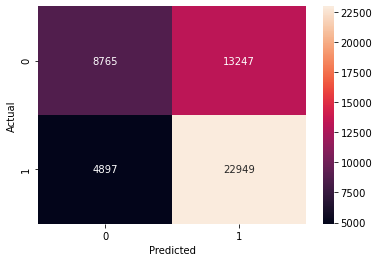

In [8]:
# Make a confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='.0f');

The **confusion matrix** shows that our model is:

* good at predicting that a project was successful when it was successful
* bad at predicting that a project failed, as it was predicted as successful.

In [9]:
# print the classification report with the precision, recall and f1 score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.40      0.49     22012
           1       0.63      0.82      0.72     27846

    accuracy                           0.64     49858
   macro avg       0.64      0.61      0.60     49858
weighted avg       0.64      0.64      0.62     49858



The **classification report** shows that our model has an *accuracy* of 0.64. *Recall* and the *f1-scores* show that our model is *bad* at predicting *failed projects*, but *good* at predicting *successfull projects*.

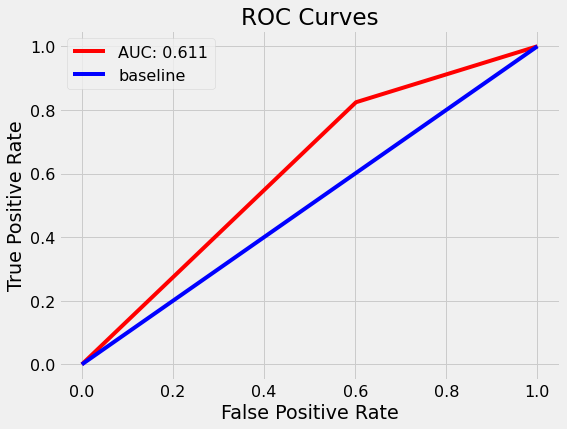

In [12]:
# Plot formatting
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
    
# Plot the roc curve and the random curve
plt.plot(fpr, tpr,'r',label = 'AUC: %.3f'%auc)
plt.plot([0,1],[0,1],'b',label='baseline')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
plt.show()

The line of an optimal **ROC curve** has a false positive rate of 0 and a true positive rate of 1, so the line should approach the one in the upper left corner. The red line of the model is better than the baseline in blue, but not optimal yet. An optimal **AUC** would be close to 1, and our AUC is 0.611. To find a better model, different models are applied in the next two notebooks.